In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

PREDICTING THE PRICE OF GOLD

In [147]:
#load the dataset
df = pd.read_csv('Gold Futures Historical Data.csv')

In [148]:
#Ensure the dates are in ascending order, not descending order
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Adjust format if needed
df = df.sort_values('Date')

In [149]:
#Count how many empty values exist in our dataset
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        2
Change %    0
dtype: int64

In [150]:
#Remove the empty entries 
df.dropna(inplace=True)

In [151]:
#Reveal the first 5 columns
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
2563,2015-01-02,"1,186.20","1,184.00","1,194.90","1,167.30",120.68K,0.18%
2562,2015-01-05,"1,204.00","1,187.80","1,207.50","1,177.80",149.11K,1.50%
2561,2015-01-06,"1,219.40","1,204.00","1,223.30","1,201.60",190.36K,1.28%
2560,2015-01-07,"1,210.70","1,219.00","1,219.40","1,209.10",117.09K,-0.71%
2559,2015-01-08,"1,208.50","1,211.00","1,216.80","1,204.20",122.49K,-0.18%


In [152]:
#Remove any commas and convert to float
numeric_cols = ['Price', 'Open', 'High', 'Low']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [153]:
#Remove the 'K' string from the dataset
df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) / 100

In [154]:
#Remove the '%' sign from the dataset
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100

<Axes: >

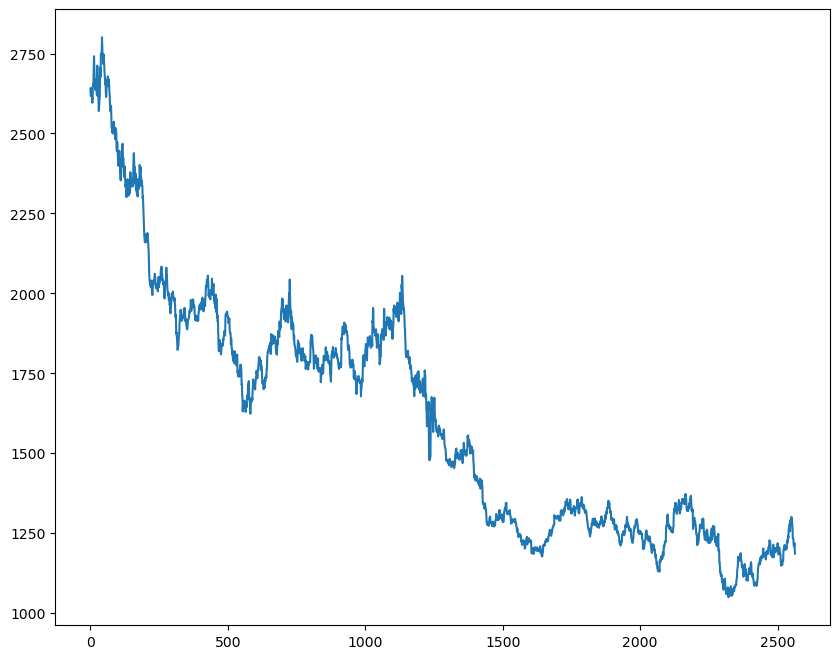

In [155]:
df['Price'].plot(figsize=(10, 8))

In [165]:
#Define variables
x = df[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']

In [166]:
#Split our variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [167]:
#Create Linear Regression Object
linreg = LinearRegression()

In [168]:
linreg.fit(x_train, y_train)

LinearRegression()

In [169]:
y_pred = linreg.predict(x_test)

In [170]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [171]:
_df

,Actual,Predicted
405,1965.7,1959.411745
824,1769.9,1774.586986
1389,1507.7,1507.572376
2085,1189.3,1184.534507
1206,1710.6,1707.635173
...,...,...
1707,1291.3,1290.740498
894,1809.9,1809.737678
92,2516.1,2519.902430
595,1718.2,1712.964084


In [172]:
#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [173]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Coefficient of Determination: {r2}")

Mean Squared Error: 23.290736957859036
Mean Absolute Error: 3.360042824623934
Coefficient of Determination: 0.9998524935860532


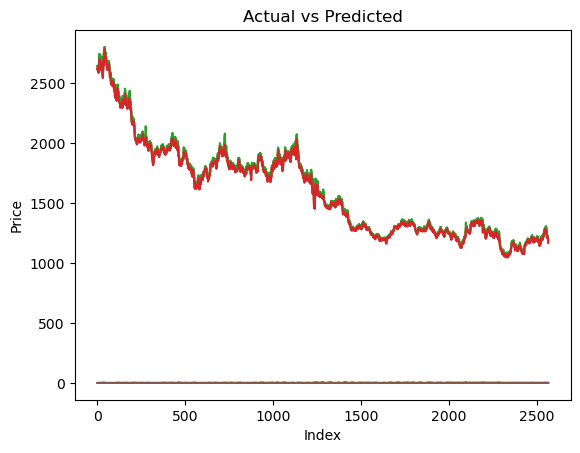

In [174]:
#Plot the graph
plt.plot(y, label="Actual")
plt.plot(x, label="Predicted")
plt.ylabel("Price")
plt.xlabel("Index")
plt.title("Actual vs Predicted")
plt.show()